# Applying input feedback for continuous machine learning (CML)
Dataset: Diabetes Dataset (https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

### 1. Prerequisite

In [1]:
# Importinig modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Function for plotting ROC curve
def plot_ROC_curve(test, pred):
    fpr, tpr, thresholds = roc_curve(test, pred)
    auc = roc_auc_score(test, pred)
    plt.plot(fpr, tpr, label='Model (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], '--', color='r', label='Random')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    plt.show()

### 2. Data Loading

In [3]:
# Reading data
df = pd.read_csv("diabetes.csv")

# Selecting particular columns
df = df[["Age", "Glucose", "Outcome"]]

# Feature matrix
x = df.drop("Outcome", axis=1)

# Target labels
y = df["Outcome"]

### 3. Model Training and Validation 

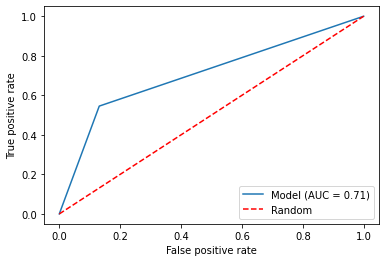

In [4]:
# Train test split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaler
sds = StandardScaler()

# Feature scaling (train and val set)
x_train = sds.fit_transform(x_train)
x_val = sds.transform(x_val)

# Model
model = LogisticRegression()

# Training
model.fit(x_train, y_train)

# Validation
y_pred = model.predict(x_val)

# Validation output
plot_ROC_curve(y_val, y_pred)

### 4. Model Testing

In [5]:
# Test dataset
df = pd.DataFrame(
[[40,120,1,1],[40,121,1,1],[38,116,0,0],[38,124,0,0],
[38,130,0,0],[38,121,0,0],[40,122,1,1],[40,120,1,1],
[38,122,0,0],[38,120,0,0],[38,129,0,0],[38,158,0,0],
[40,119,1,1],[39,108,1,1],[39,126,1,1],[39,128,1,1],
[38,116,1,1],[38,104,1,1],[38,100,1,1],[38,121,1,1],
[38,122,1,1],[38,120,1,1],[38,119,1,1],[38,118,1,1],
[38,126,1,1],[38,118,1,1],[38,116,1,1],[38,124,1,1],
[40,120,0,0],[40,141,0,0],[40,152,0,0],[40,120,0,0],
[40,119,0,0],[39,118,0,0],[39,126,0,0],[39,118,0,0],
[38,126,0,0],[38,118,0,0],[38,116,0,0],[38,124,0,0]], 
columns=["Age","Glucose","On_Insulin","Outcome"])

### 4.1. Test Data Summary

- Test data has an additional column i.e. On_Insulin (0: not on_insulin and 1: on_insulin).
- In the test data the Glucose value of diabetic patients were kept normal if they are on insulin.

In [6]:
# Test data summary
df.head(n=10)

,Age,Glucose,On_Insulin,Outcome
0,40,120,1,1
1,40,121,1,1
2,38,116,0,0
3,38,124,0,0
4,38,130,0,0
5,38,121,0,0
6,40,122,1,1
7,40,120,1,1
8,38,122,0,0
9,38,120,0,0


### 4.2. Testing without feedback

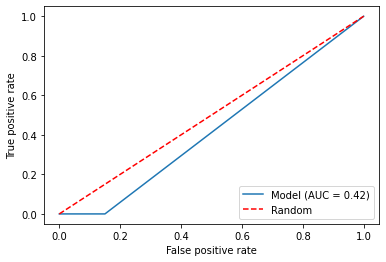

In [7]:
# Feature matrix
x_test = df.drop(["On_Insulin","Outcome"], axis=1)

# Target labels
y_test = df["Outcome"]

# Feature scaling (test set)
x_test = sds.transform(x_test)

# Testing
y_pred = model.predict(x_test)

# Test output
plot_ROC_curve(y_test, y_pred)

### 4.3. Testing with feedback

### Feedback mechanism

- The feedback was provided to the model using the On_Insulin column.
- The Glucose value of diabetic patients (Outcome = 1) were increased by 50 if they are on insulin (On_Insulin = 1). This is done considering the fact that each unit of insulin cause blood sugar level to drop by 50 mg/dL.

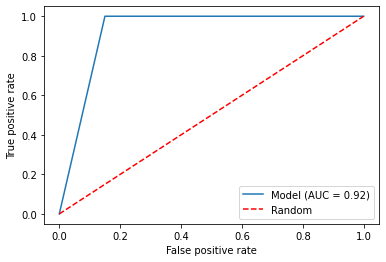

In [8]:
# Feedback Condition
df.loc[df.On_Insulin==1,"Glucose"] += 50

# Feature matrix
x_test = df.drop(["On_Insulin","Outcome"], axis=1)

# Target labels
y_test = df["Outcome"]

# Feature scaling (test set)
x_test = sds.transform(x_test)

# Testing
y_pred = model.predict(x_test)

# Test output
plot_ROC_curve(y_test, y_pred)